# prompting the past
Distant reading code for the [Prompting the Past DH 2024 proposal](https://github.com/inactinique/DH2024_prompting_the_past/)

## We start with LDA (gensim)

### required libraries

- gensim (gensim-4.3.2 numpy-1.26.2 scipy-1.11.4 smart-open-6.4.0)
- pandas (pandas-2.1.3 pytz-2023.3.post1 tzdata-2023.3)
- nltk (click-8.1.7 nltk-3.8.1 regex-2023.10.3 tqdm-4.66.1)
- pyLDAvis (MarkupSafe-2.1.3 funcy-2.0 jinja2-3.1.2 joblib-1.3.2 numexpr-2.8.7 pyLDAvis-3.4.1 scikit-learn-1.3.2 setuptools-69.0.2 threadpoolctl-3.2.0)
- matplotlib (contourpy-1.2.0 cycler-0.12.1 fonttools-4.46.0 kiwisolver-1.4.5 matplotlib-3.8.2 pyparsing-3.1.1)

In [1]:
# Install necessary libraries if you haven't already
# !pip install gensim
# !pip install numpy
# !pip install nltk 
# !pip install pyLDAvis
# !pip install matplotlib


### import libraries

In [2]:
# Import libraries
from gensim import corpora
from gensim.models import LdaModel
from gensim.corpora import Dictionary
from pprint import pprint
import nltk
from nltk.corpus import stopwords


### load the corpus

In [3]:
# define corpus_file
corpus_file = 'data/european_union.txt'

# Read the corpus from the file
with open(corpus_file, 'r', encoding='utf-8') as file:
    corpus = [line.strip() for line in file]

### prepare the corpus: remove stopwords, tokenize, create a dictionnary, filter out few used words

In [5]:
# we disable ssl checking, otherwise nltk.download won't work. Other solutions are available here: https://stackoverflow.com/questions/41348621/ssl-error-downloading-nltk-data
# uncomment if necessary (if nltk_data is not downloaded)

# import ssl
#try:
#    _create_unverified_https_context = ssl._create_unverified_context
#except AttributeError:
#    pass
#else:
#    ssl._create_default_https_context = _create_unverified_https_context

# nltk stopwords

# uncomment line below if you need to download nltk_data
# nltk.download()
stop_words = set(stopwords.words('english'))

# Tokenize the texts and remove stopwords
tokenized_texts = [[word for word in text.split() if word.lower() not in stop_words] for text in corpus]

# Create a dictionary representation of the documents
dictionary = Dictionary(tokenized_texts)

# Filter out words that occur less than 5 documents or more than 50% of the documents
dictionary.filter_extremes(no_below=5, no_above=0.5)




### And now LDA


In [9]:
# Create a bag-of-words representation of the documents
corpus_bow = [dictionary.doc2bow(text) for text in tokenized_texts]

# Train the LDA model
num_topics = 20  # You can adjust this parameter based on your requirements
lda_model = LdaModel(corpus_bow, num_topics=num_topics, id2word=dictionary, passes=15)

# Print the topics and their top words
pprint(lda_model.print_topics())

[(0,
  '0.178*"flag" + 0.043*"design" + 0.032*"winning" + 0.028*"communist" + '
  '0.027*"European" + 0.025*"Union," + 0.021*"future" + 0.021*"bright" + '
  '0.021*"8K," + 0.021*"reddit"'),
 (1,
  '0.037*"detailed," + 0.024*"standing" + 0.024*"Rutkowski" + 0.024*"Greg" + '
  '0.024*"painting," + 0.024*"focus," + 0.023*"digital" + 0.023*"highly" + '
  '0.023*"sharp" + 0.023*"concept"'),
 (2,
  '0.049*"background," + 0.028*"yellow" + 0.026*"kremlin" + 0.021*"patch" + '
  '0.020*"&" + 0.019*"hyper" + 0.018*"blue" + 0.018*"soldier" + 0.018*"art," + '
  '0.018*"d,"'),
 (3,
  '0.127*"logo" + 0.047*"blue" + 0.046*"3" + 0.039*"vector" + 0.032*"render" + '
  '0.029*"star" + 0.024*"mobile" + 0.024*"game," + 0.022*"isometric" + '
  '0.020*"image"'),
 (4,
  '0.140*"map" + 0.037*"high" + 0.029*"detailed" + 0.028*"highly" + '
  '0.021*"europe" + 0.021*"detailed," + 0.021*"r" + 0.019*"/" + '
  '0.017*"quality" + 0.017*"war"'),
 (5,
  '0.047*"1" + 0.040*"0" + 0.035*"9" + 0.033*"painting" + 0.033*"greg

### Visualize topics

In [10]:
# Import library
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

# Visualize topics
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, corpus_bow, dictionary)
pyLDAvis.display(vis)


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/joblib/_utils.py:38: DeprecationWarning: ast.Num is deprecated and will be removed in Python 3.14; use ast.Constant instead
  if isinstance(node, ast.Num):  # <number>
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/joblib/_utils.py:38: DeprecationWarning: ast.Num is deprecated and will be removed in Python 3.14; use ast.Constant instead
  if isinstance(node, ast.Num):  # <number>
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/joblib/_utils.py:39: DeprecationWarning: Attribute n is deprecated and will be removed in Python 3.14; use value instead
  return node.n
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/joblib/_utils.py:38: DeprecationWarning: ast.Num is deprecated and will be removed in Python 3.14; use ast.Constant instead
  if isinstance(node, ast.Num):  # <number>
/Library/Frameworks/Python.framework/Ve

### looking at dominant topic for each document (line in the corpus)

In [11]:
# Get the dominant topic for each document in the corpus
dominant_topics = [max(lda_model[doc], key=lambda x: x[1]) for doc in corpus_bow]

# Create a dictionary to store texts for each topic
topics_dict = {i: [] for i in range(num_topics)}

# Group texts by their dominant topics
for i, topic in enumerate(dominant_topics):
    topics_dict[topic[0]].append(corpus[i])

# Print texts for each topic
for topic, texts in topics_dict.items():
    print(f"Topic {topic}:")
    for text in texts:
        print(f" - {text}")
    print("\n")

Topic 0:
 - 
 - european country flag
 - winning flag design for communist European Union, hammer and sickle design, reddit vexillology, 8K, legacy, bright future
 - Eurofuturism
 - a flag for a communist European Union,
 - european flag and danish flag combined
 - winning flag design for communist European Union, hammer and sickle design, reddit vexillology, 8K, legacy, bright future
 - award winning flag design selected for a communist European Union, reddit vexillology, 8K, concept art, legacy, bright future
 - the flag of a glitching society
 - a flag for a communist European Union,
 - flag of a communist united states with chinese words written on it
 - european flag and danish flag combined
 - award winning flag design selected for a communist European Union, hammer and sickle design, reddit vexillology, 8K, concept art, legacy, bright future
 - luopasjarvi county flag
 - winning flag design for communist European Union, hammer and sickle design, reddit vexillology, 8K, legacy, b

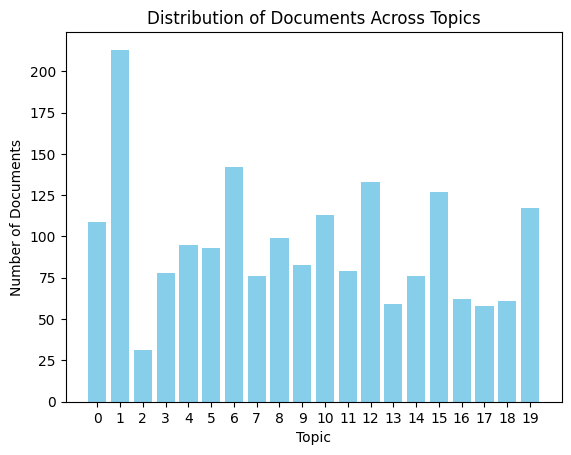

In [13]:

import matplotlib.pyplot as plt
import numpy as np

# Count the number of documents in each topic
topic_counts = np.zeros(num_topics)
for topic in dominant_topics:
    topic_counts[topic[0]] += 1

# Plot the bar chart
plt.bar(range(num_topics), topic_counts, tick_label=range(num_topics), color='skyblue')
plt.xlabel('Topic')
plt.ylabel('Number of Documents')
plt.title('Distribution of Documents Across Topics')
plt.show()
